[](http://)**27/11/2019**

**Elijah Zolduoarrati**

Exploratory Data Analysis task using Python, seaborn and matplotlib.


### Table of Contents: <a id="1"></a>
1. [About the dataset](#1)
2. [Importing Data](#3)
3. [EDA & Preprocessing](#4)
    1. [Boxplot of Numerical Variables](#5)
    2. [Handling Outliers](#6)
    3. [Joint Distribution of bra_size vs size](#7)
4. [Data Cleaning & Preprocessing](#8)
    1. [Initial Distribution of Features](#9)
    2. [Step-by-step feature processing](#10)
        1. [Feature Engineering - new feature added](#11)
5. [EDA via Visualizations](#12)
    1. [Distribution of features](#13)
    2. [Categories vs. Fit/Length/Quality](#14)
    3. [Users vs Items bought](#15)
    4. [Height vs Shoe-size](#16)
6. [References](#references)
7. [Assumptions](#assumptions)

<a id="3"></a>
### About the dataset
>This dataset contains stack overflow usa users questions and answers plus other variables such as votes, reputation, views, etc .. 
>1. [Stack Exchange](https://stackexchange.com/)
>2. [Stack Overflow](https://stackoverflow.com/)
>
>[[1]](#references) Stack Exchange is a network of question-and-answer websites on topics in diverse fields, each site covering a specific topic, where questions, answers, and users are subject to a reputation award process. The reputation system allows the sites to be self-moderating. 
>
>**Note:** In dataset, fit feedback belongs to one of three classes: ‘Small,’ ‘Fit,’ and ‘Large.’ And also, some [assumptions](#assumptions) have been made about the features in the dataset.

In [234]:
# loading files from kaggle
import os
# library for linear algebra
import numpy as np
# dataframe processing library for reading files
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# dedicated import for matplot library
import matplotlib
# library for ploting data
import matplotlib.pyplot as plt
# data visualization library based on matplotlib
import seaborn as sns
print(os.listdir("../input"))
# supressing all kernal warnings
import warnings
warnings.filterwarnings("ignore")
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 10)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

['usa-all-update1']


<a id="2"></a>
#  [Stack Overflow](https://stackoverflow.com) Dataset
<a id="3"></a>
## Importing data using Pandas framework
Taking a look at the first few lines of the stack data's csv file using the inbuilt OS bash command-head.

In [235]:
# View the first n (here-10) lines of the csv file.
! head -n 1 ../input/usa-all-update1/usa.csv

Id,AboutMe,AboutMe_length,CreationDate,LastAccessDate,activity_in_months,DisplayName,Location,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_PrivilegeWiki,p_TagWiki,p_TagWikiExerpt,p_Wiki,p_WikiPlaceholder,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_QuestionMerged,ph_PostMigrated,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionUnmerged,ph_PostDisassociated,ph_QuestionProtected,ph_SuggestedEditApplied,ph_UnknownDevRelatedEvent,ph_PostTweeted,ph_VoteNullificationByDev,ph_UnknownSuggestionEvent,ph_PostUnmigrated,ph_UnknownModeratorEvent,ph_UnknownEvent,ph_CommentDiscussionMovedToChat,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,ph_PostMigratedHere


In [236]:
# Using the pd.read_csv() function the csv file is brought into a pandas DataFrame
df = pd.read_csv("../input/usa-all-update1/usa.csv",encoding="ISO-8859-1")
df.head()

,Id,AboutMe,AboutMe_length,CreationDate,LastAccessDate,activity_in_months,DisplayName,Location,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_PrivilegeWiki,p_TagWiki,p_TagWikiExerpt,p_Wiki,p_WikiPlaceholder,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_QuestionMerged,ph_PostMigrated,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionUnmerged,ph_PostDisassociated,ph_QuestionProtected,ph_SuggestedEditApplied,ph_UnknownDevRelatedEvent,ph_PostTweeted,ph_VoteNullificationByDev,ph_UnknownSuggestionEvent,ph_PostUnmigrated,ph_UnknownModeratorEvent,ph_UnknownEvent,ph_CommentDiscussionMovedToChat,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,ph_PostMigratedHere
0,7784035,<p>This product may also help you to feel full...,1407.0,2017-03-29 06:30:11.463 UTC,2017-03-29 06:30:11.463 UTC,0.0,berwenally,New York,0,0,1,2,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9126518,<p>A simple way to keep your hands moisturized...,622.0,2017-12-21 10:07:00.237 UTC,2017-12-21 10:07:00.237 UTC,0.0,TeresaEWilliams,United States,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10021482,<p>Completely covers and protects your body pi...,370.0,2018-07-02 12:09:47.843 UTC,2018-07-02 13:30:11.797 UTC,0.0,kimberly02,Fremont,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2739419,<p>POOL TABLES FOR SALE CONTEMPORARY CLASSIC C...,400.0,2013-09-02 10:00:27.57 UTC,2013-09-02 10:00:27.57 UTC,0.0,USA Made Pool Tables,California,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1440631,<p>I am a Software Engineer</p>\n,32.0,2012-06-06 19:21:00.903 UTC,2012-06-06 19:36:13.78 UTC,0.0,twinkle,United States,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="4"></a>
# Exploratory Data Analysis (EDA)

We can already make few observations here, by looking at the head of the data:

1. There is a need for a proper mechanisim to handle missing values across the dataframe.
2. Location contains multiple variables which might need handling if we decided to consider it as 'category' datatype.
3. specific columns might need parsing and extraction to have a set of valid numerical quantitative values.
4. There are some columns that might require renaming or removing spaces.
5. We will need to apply the len fuction on the AboutMe field to transfer it from qualitative to quantitative which might help in indicating developers orientation

For a starter, we are going to handle the naming convention for columns using pandas.

In [237]:
# Changing columns names if needed
# df.columns = ['Id', 'AboutMe', 'AboutMe_length', 'CreationDate', 'LastAccessDate', 'activity_in_months', 'DisplayName', 'Location', 'UpVotes', 'DownVotes', 'Reputation', 'Views', 'badges', 'Q_comments', 'A_comments', 'P_questions', 'P_answers', 'p_ModeratorNomination', 'p_PrivilegeWiki', 'p_TagWiki', 'p_TagWikiExerpt', 'p_Wiki', 'p_WikiPlaceholder', 'ph_InitialTitle', 'ph_EditTitle', 'ph_InitialBody', 'ph_InitialTags', 'ph_EditBody', 'ph_EditTags', 'ph_RollbackTitle', 'ph_RollbackBody', 'ph_PostReopened', 'ph_RollbackTags', 'ph_PostClosed', 'ph_PostDeleted', 'ph_PostUndeleted', 'ph_QuestionMerged', 'ph_PostMigrated', 'ph_CommunityOwned', 'ph_PostLocked', 'ph_PostUnlocked', 'ph_QuestionUnprotected', 'ph_QuestionUnmerged', 'ph_PostDisassociated', 'ph_QuestionProtected', 'ph_SuggestedEditApplied', 'ph_UnknownDevRelatedEvent', 'ph_PostTweeted', 'ph_VoteNullificationByDev', 'ph_UnknownSuggestionEvent', 'ph_PostUnmigrated', 'ph_UnknownModeratorEvent', 'ph_UnknownEvent', 'ph_CommentDiscussionMovedToChat', 'ph_PostNoticeRemoved', 'ph_PostNoticeAdded', 'ph_PostMergeSource', 'ph_PostMigratedAway', 'ph_PostMergeDestination', 'ph_PostMigratedHere']

In [238]:
#True means it contains missing values
pd.isnull(df).any()

Id                                 False
AboutMe                             True
AboutMe_length                      True
CreationDate                       False
LastAccessDate                     False
activity_in_months                 False
DisplayName                         True
Location                           False
UpVotes                            False
DownVotes                          False
Reputation                         False
Views                              False
badges                             False
Q_comments                          True
A_comments                          True
P_questions                        False
P_answers                          False
p_ModeratorNomination               True
p_PrivilegeWiki                     True
p_TagWiki                           True
p_TagWikiExerpt                     True
p_Wiki                              True
p_WikiPlaceholder                   True
ph_InitialTitle                     True
ph_EditTitle    

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86894 entries, 0 to 86893
Data columns (total 60 columns):
Id                                 86894 non-null int64
AboutMe                            35205 non-null object
AboutMe_length                     60774 non-null float64
CreationDate                       86894 non-null object
LastAccessDate                     86894 non-null object
activity_in_months                 86894 non-null float64
DisplayName                        86890 non-null object
Location                           86894 non-null object
UpVotes                            86894 non-null int64
DownVotes                          86894 non-null int64
Reputation                         86894 non-null int64
Views                              86894 non-null int64
badges                             86894 non-null int64
Q_comments                         33219 non-null float64
A_comments                         33219 non-null float64
P_questions                        868

## Extend our observations on missing data:
* looking at the columns in the csv file, we can notice that we have three types of missing data:
* Out of 60 columns
*  1. 12 columns have complete data and these columns are:  **Id, CreationDate, LastAcessDate, activity_in_months, Location, UpVotes, DownVotes, Reputation, Views, badges, P_questions and P_answers**
*  2. Columns that have missing data between 0% to 50% such as 'DisplayName' and 'AboutMe_length'
*  3. Columns indicating medium amount of missing data between 50% to 70% such as: 'Q_comments', 'A_comments', 'ph_InitialTitle', 'ph_EditTitle', 'ph_InitialBody', 'ph_InitialTags', 'ph_EditBody','ph_EditTags'
*  4. Other columns have missing data between 90% to 100%, these columns are: 'p_ModeratorNomination', 'p_PrivilegeWiki', 'p_TagWiki', 'p_TagWikiExerpt', 'p_Wiki', 'p_WikiPlaceholder', 'ph_EditTitle', 'ph_EditTags', 'ph_RollbackTitle', 'ph_RollbackBody', 'ph_PostReopened', 'ph_RollbackTags', 'ph_PostClosed', 'ph_PostDeleted', 'ph_PostUndeleted', 'ph_QuestionMerged', 'ph_PostMigrated', 'ph_CommunityOwned', 'ph_PostLocked', 'ph_PostUnlocked', 'ph_QuestionUnprotected', 'ph_QuestionUnmerged', 'ph_PostDisassociated', 'ph_QuestionProtected', 'ph_SuggestedEditApplied', 'ph_UnknownDevRelatedEvent', 'ph_PostTweeted', 'ph_VoteNullificationByDev', 'ph_UnknownSuggestionEvent', 'ph_PostUnmigrated', 'ph_UnknownModeratorEvent', 'ph_UnknownEvent', 'ph_CommentDiscussionMovedToChat', 'ph_PostNoticeRemoved', 'ph_PostNoticeAdded', 'ph_PostMergeSource', 'ph_PostMigratedAway', 'ph_PostMergeDestination', 'ph_PostMigratedHere'
* From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as `ph_QuestionMerged` and `ph_SuggestedEditApplied`). 

### Looking at the percentage of missing values per column closely

In [240]:
missing_data = pd.DataFrame({'total_missing': pd.isnull(df).sum(), 'missing_percentage':round((df.isnull().sum()/86894)*100,2)})
missing_data

,total_missing,missing_percentage
Id,0,0.00
AboutMe,51689,59.49
AboutMe_length,26120,30.06
CreationDate,0,0.00
LastAccessDate,0,0.00
activity_in_months,0,0.00
DisplayName,4,0.00
Location,0,0.00
UpVotes,0,0.00
DownVotes,0,0.00


We can extend our observations on missing data and the datatypes here:

* looking at the columns in the csv file, we can notice that we have three types of missing data:
*  1. Columns that have no missing data such as : 'Id', 'CreationDate', 'DownVotes','LastAccessDate', 'Location', 'Reputation', 'UpVotes', 'Views', 'badges', 'P_questions', 'P_answers'
*  2. Columns that have missing data between 0% to 50% such as 'DisplayName' and 'AboutMe_length'
*  3. Columns indicating medium amount of missing data between 50% to 70% such as: 'Q_comments', 'A_comments', 'ph_InitialTitle', 'ph_EditTitle', 'ph_InitialBody', 'ph_InitialTags', 'ph_EditBody','ph_EditTags'
*  4. Other columns have missing data between 90% to 100%, these columns are: 'p_ModeratorNomination', 'p_PrivilegeWiki', 'p_TagWiki', 'p_TagWikiExerpt', 'p_Wiki', 'p_WikiPlaceholder', 'ph_EditTitle', 'ph_EditTags', 'ph_RollbackTitle', 'ph_RollbackBody', 'ph_PostReopened', 'ph_RollbackTags', 'ph_PostClosed', 'ph_PostDeleted', 'ph_PostUndeleted', 'ph_QuestionMerged', 'ph_PostMigrated', 'ph_CommunityOwned', 'ph_PostLocked', 'ph_PostUnlocked', 'ph_QuestionUnprotected', 'ph_QuestionUnmerged', 'ph_PostDisassociated', 'ph_QuestionProtected', 'ph_SuggestedEditApplied', 'ph_UnknownDevRelatedEvent', 'ph_PostTweeted', 'ph_VoteNullificationByDev', 'ph_UnknownSuggestionEvent', 'ph_PostUnmigrated', 'ph_UnknownModeratorEvent', 'ph_UnknownEvent', 'ph_CommentDiscussionMovedToChat', 'ph_PostNoticeRemoved', 'ph_PostNoticeAdded', 'ph_PostMergeSource', 'ph_PostMigratedAway', 'ph_PostMergeDestination', 'ph_PostMigratedHere'

### Descriptive statistics for all numerical variables

In [241]:
df.describe(include = [np.number])

,Id,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_PrivilegeWiki,p_TagWiki,p_TagWikiExerpt,p_Wiki,p_WikiPlaceholder,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_QuestionMerged,ph_PostMigrated,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionUnmerged,ph_PostDisassociated,ph_QuestionProtected,ph_SuggestedEditApplied,ph_UnknownDevRelatedEvent,ph_PostTweeted,ph_VoteNullificationByDev,ph_UnknownSuggestionEvent,ph_PostUnmigrated,ph_UnknownModeratorEvent,ph_UnknownEvent,ph_CommentDiscussionMovedToChat,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,ph_PostMigratedHere
count,8.689400e+04,60774.000000,86894.000000,86894.000000,86894.000000,86894.000000,86894.000000,86894.000000,33219.000000,33219.000000,86894.000000,86894.000000,19.000000,0.0,658.000000,789.000000,0.0,0.0,33674.000000,8547.000000,41378.000000,33670.000000,25711.000000,8567.000000,322.000000,1113.000000,92.000000,398.000000,142.000000,3358.000000,3373.000000,0.0,0.0,1118.00000,6.000000,7.000000,21.000000,0.0,0.0,82.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1276.000000,2126.000000,5.000000,5.000000,5.000000,0.0
mean,4.694808e+06,126.298285,36.291337,67.435404,8.435450,722.078118,86.918694,10.961804,7.427406,15.392035,4.782240,14.696458,1.473684,NaN,3.091185,3.179975,NaN,NaN,10.246303,11.214578,32.545096,10.243184,32.745829,16.317264,3.838509,5.032345,19.478261,2.630653,153.450704,3.533651,3.570709,NaN,NaN,3.52415,115.166667,12.000000,4.238095,NaN,NaN,14.634146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.060345,2.387582,81.200000,66.000000,246.800000,NaN
std,3.396537e+06,267.979593,37.832210,399.892573,239.575432,7949.085756,1517.161333,40.850660,23.347089,128.608637,20.909395,254.464277,0.841191,NaN,7.855093,10.544349,NaN,NaN,30.840631,96.077860,194.375120,30.829521,252.202607,126.080963,11.744105,22.813106,55.405097,6.301954,651.719271,15.315680,16.483073,NaN,NaN,31.95998,179.208724,15.209646,8.642365,NaN,NaN,72.245383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.499507,4.662674,114.707018,131.556072,340.281795,NaN
min,2.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.00000,3.000000,1.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,10.000000,1.000000,28.000000,NaN
25%,1.613272e+06,0.000000,2.400000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,NaN,NaN,1.00000,25.000000,2.500000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,17.000000,1.000000,61.000000,NaN
50%,3.923227e+06,32.000000,22.200000,0.000000,0.000000,6.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,NaN,NaN,3.000000,2.000000,5.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,12.500000,1.000000,1.000000,NaN,NaN,1.00000,43.500000,6.000000,1.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,43.000000,9.000000,147.000000,NaN
75%,7.877205e+06,133.000000,64.200000,8.000000,0.000000,97.000000,19.000000,8.000000,6.000000,5.000000,3.000000,3.000000,2.000000,NaN,2.000000,2.000000,NaN,NaN,8.000000,4.000000,18.000000,8.000000,13.000000,5.000000,2.000000,3.000000,17.250000,2.000000,57.500000,2.000000,2.000000,NaN,NaN,2.00000,92.000000,14.000000,2.000000,NaN,NaN,7.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,52.00000

We are going to list all the types of our data from our dataset and take only the numerical ones to plot them

In [242]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [243]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,p_ModeratorNomination,p_PrivilegeWiki,p_TagWiki,p_TagWikiExerpt,p_Wiki,p_WikiPlaceholder,ph_InitialTitle,ph_EditTitle,ph_InitialBody,ph_InitialTags,ph_EditBody,ph_EditTags,ph_RollbackTitle,ph_RollbackBody,ph_PostReopened,ph_RollbackTags,ph_PostClosed,ph_PostDeleted,ph_PostUndeleted,ph_QuestionMerged,ph_PostMigrated,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionUnmerged,ph_PostDisassociated,ph_QuestionProtected,ph_SuggestedEditApplied,ph_UnknownDevRelatedEvent,ph_PostTweeted,ph_VoteNullificationByDev,ph_UnknownSuggestionEvent,ph_PostUnmigrated,ph_UnknownModeratorEvent,ph_UnknownEvent,ph_CommentDiscussionMovedToChat,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination,ph_PostMigratedHere
0,7784035,1407.0,0.0,0,0,1,2,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9126518,622.0,0.0,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10021482,370.0,0.0,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2739419,400.0,0.0,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1440631,32.0,0.0,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now lets plot them all:

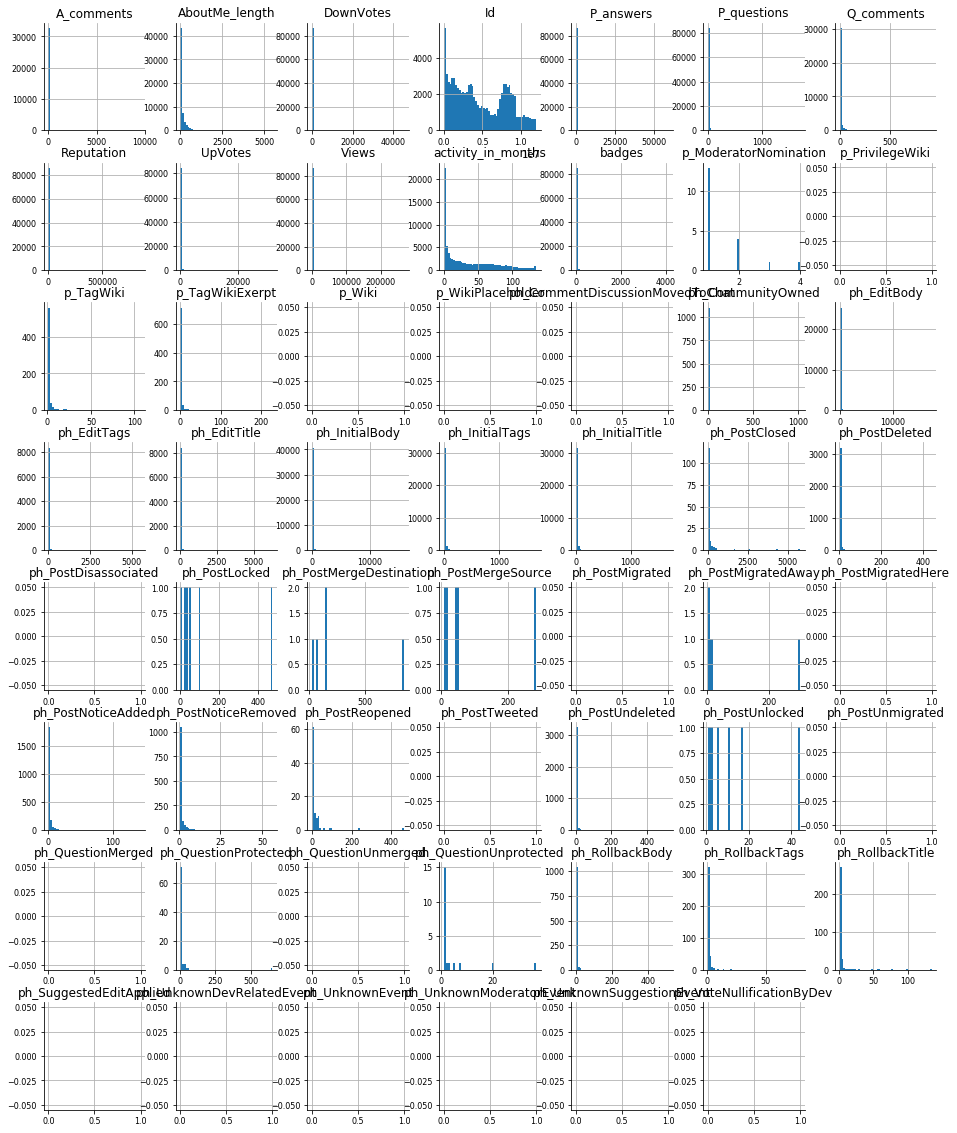

In [244]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Before processing the data we would like to find any variable that is strongly correlated with independent features `P_questions and P_answers`. We'll store them in a var called `golden_features_list`. We'll reuse our `df_num` dataset to do so.

In [245]:
df_num_corr = df_num.corr()['P_questions'][:-45]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with P_questions:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with P_questions:
Q_comments    0.768650
badges        0.594039
Name: P_questions, dtype: float64


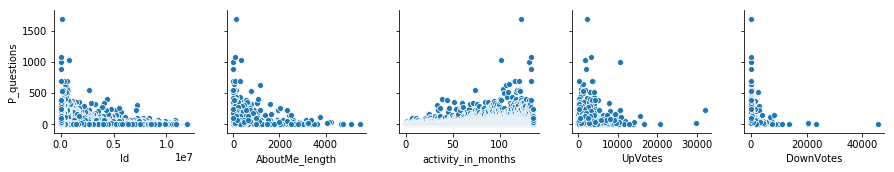

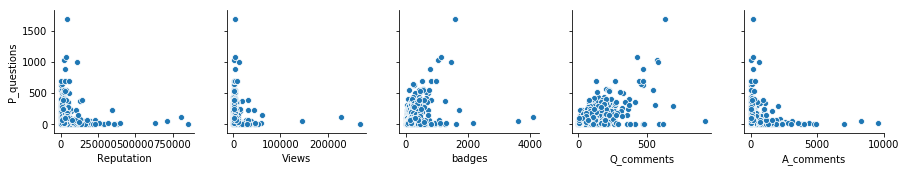

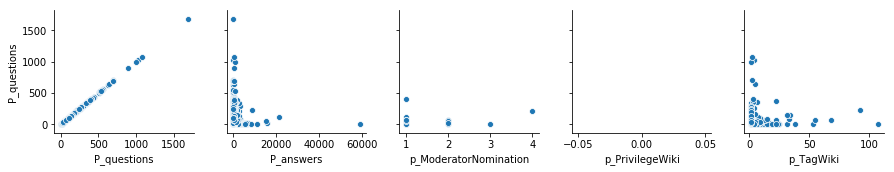

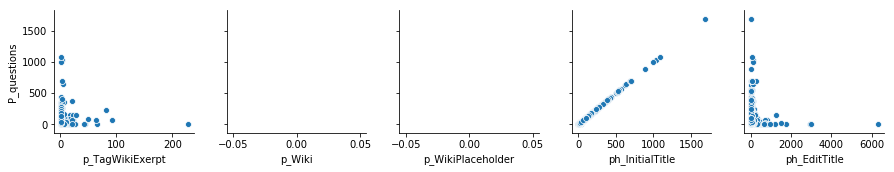

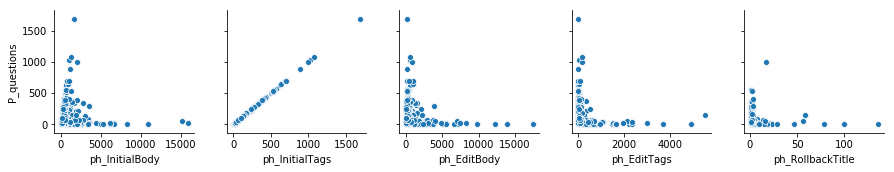

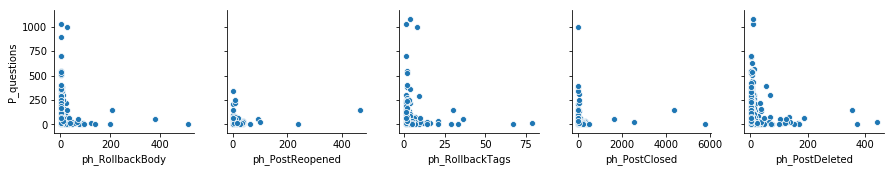

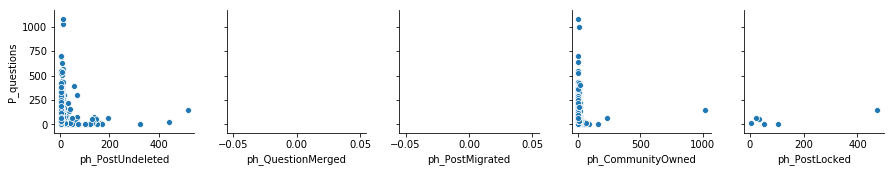

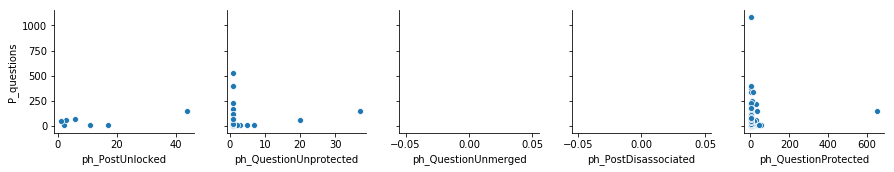

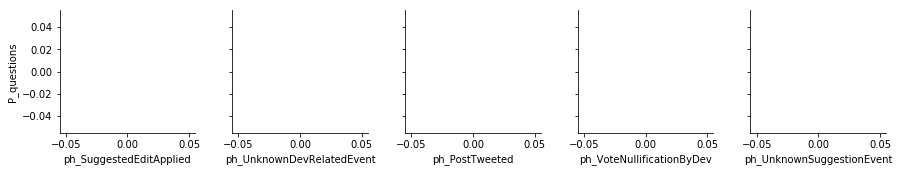

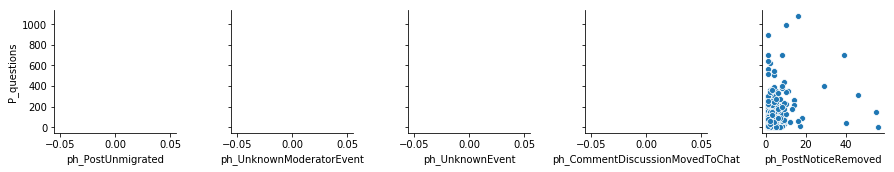

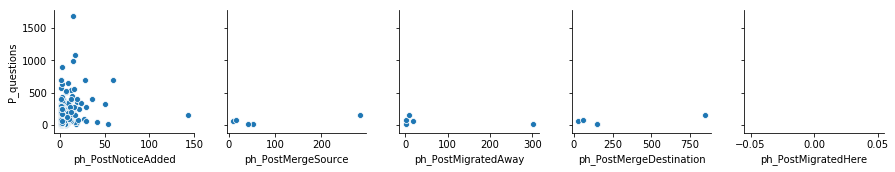

In [246]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['P_questions'])

In [247]:
df_num_corr = df_num.corr()['P_answers'][:-44] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with P_answers:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with P_answers:
A_comments    0.966265
Views         0.878901
Reputation    0.795818
badges        0.500124
Name: P_answers, dtype: float64


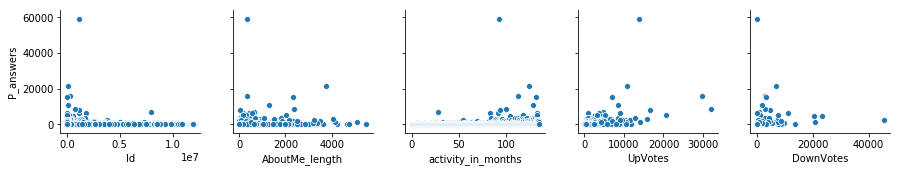

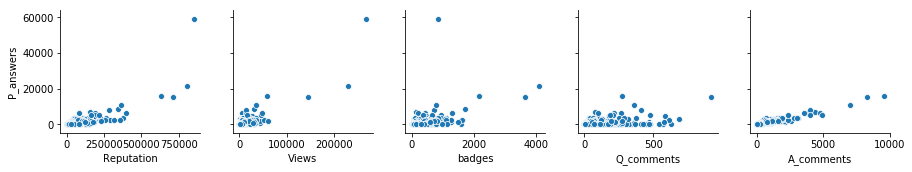

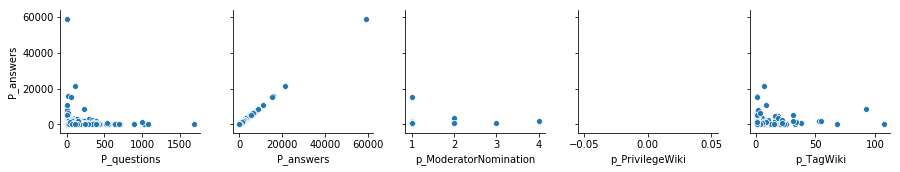

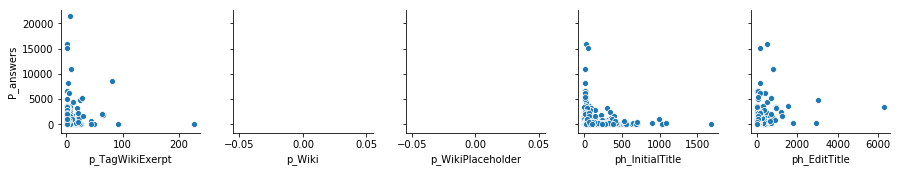

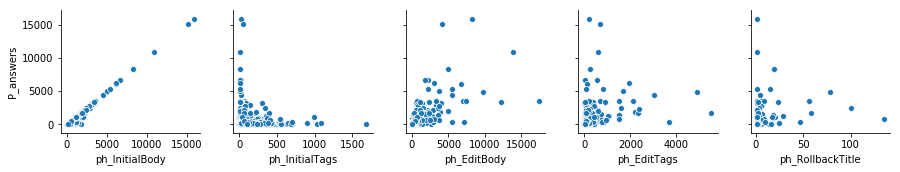

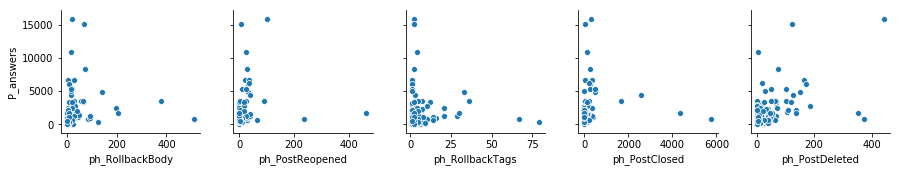

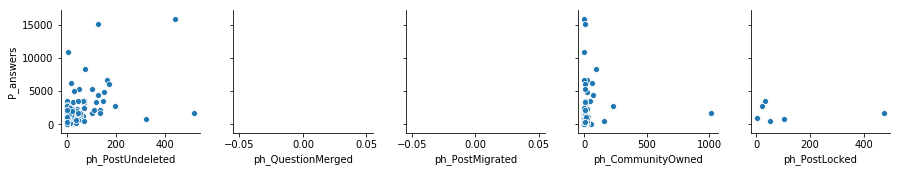

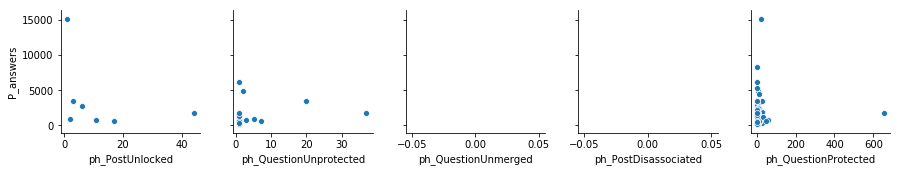

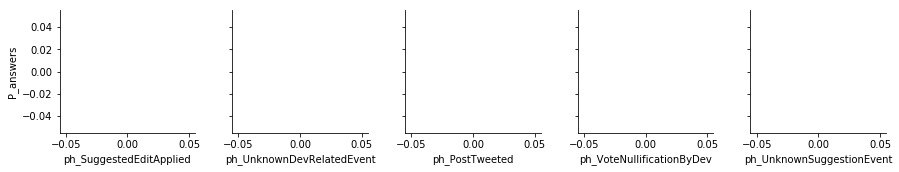

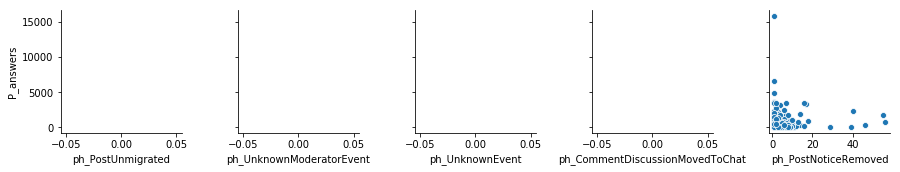

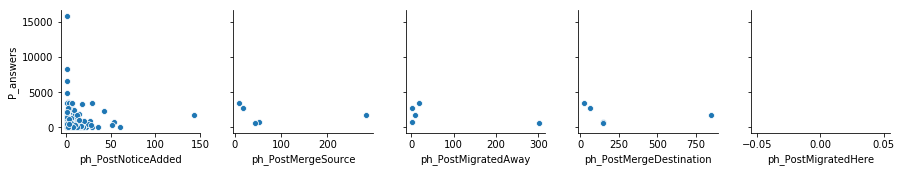

In [248]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['P_answers'])

There are many features to analyse. Thus, It may be better to concentrate on the ones which can give us real insights so let's remove features with more than  80% of `NaN` values.

In [249]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) > 0.2]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Id, p_ModeratorNomination, p_PrivilegeWiki, p_TagWiki, p_TagWikiExerpt, p_Wiki, p_WikiPlaceholder, ph_EditTitle, ph_EditTags, ph_RollbackTitle, ph_RollbackBody, ph_PostReopened, ph_RollbackTags, ph_PostClosed, ph_PostDeleted, ph_PostUndeleted, ph_QuestionMerged, ph_PostMigrated, ph_CommunityOwned, ph_PostLocked, ph_PostUnlocked, ph_QuestionUnprotected, ph_QuestionUnmerged, ph_PostDisassociated, ph_QuestionProtected, ph_SuggestedEditApplied, ph_UnknownDevRelatedEvent, ph_PostTweeted, ph_VoteNullificationByDev, ph_UnknownSuggestionEvent, ph_PostUnmigrated, ph_UnknownModeratorEvent, ph_UnknownEvent, ph_CommentDiscussionMovedToChat, ph_PostNoticeRemoved, ph_PostNoticeAdded, ph_PostMergeSource, ph_PostMigratedAway, ph_PostMergeDestination, ph_PostMigratedHere, 



In [250]:
df.head()

,AboutMe,AboutMe_length,CreationDate,LastAccessDate,activity_in_months,DisplayName,Location,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,ph_InitialTitle,ph_InitialBody,ph_InitialTags,ph_EditBody
0,<p>This product may also help you to feel full...,1407.0,2017-03-29 06:30:11.463 UTC,2017-03-29 06:30:11.463 UTC,0.0,berwenally,New York,0,0,1,2,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,<p>A simple way to keep your hands moisturized...,622.0,2017-12-21 10:07:00.237 UTC,2017-12-21 10:07:00.237 UTC,0.0,TeresaEWilliams,United States,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,<p>Completely covers and protects your body pi...,370.0,2018-07-02 12:09:47.843 UTC,2018-07-02 13:30:11.797 UTC,0.0,kimberly02,Fremont,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,<p>POOL TABLES FOR SALE CONTEMPORARY CLASSIC C...,400.0,2013-09-02 10:00:27.57 UTC,2013-09-02 10:00:27.57 UTC,0.0,USA Made Pool Tables,California,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,<p>I am a Software Engineer</p>\n,32.0,2012-06-06 19:21:00.903 UTC,2012-06-06 19:36:13.78 UTC,0.0,twinkle,United States,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN


<font color='chocolate'> Note: If we take the features we just removed and look at their description in the homepage we can deduct that these features may not be present to all users as it requires higher clarification access (which explains the `NaN` values).</font>

Now lets take a look at how the following variables **activity_in_months, UpVotes, DownVotes, Reputation, Views, badges, P_questions and P_answers** are distributed

count    86894.000000
mean        36.291337
std         37.832210
min          0.000000
25%          2.400000
50%         22.200000
75%         64.200000
max        134.900000
Name: activity_in_months, dtype: float64
count    86894.000000
mean         8.435450
std        239.575432
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45436.000000
Name: DownVotes, dtype: float64
count     86894.000000
mean        722.078118
std        7949.085756
min           1.000000
25%           1.000000
50%           6.000000
75%          97.000000
max      851064.000000
Name: Reputation, dtype: float64
count    86894.000000
mean        67.435404
std        399.892573
min          0.000000
25%          0.000000
50%          0.000000
75%          8.000000
max      32067.000000
Name: UpVotes, dtype: float64
count     86894.000000
mean         86.918694
std        1517.161333
min           0.000000
25%           0.000000
50%           3.000000
75%          1

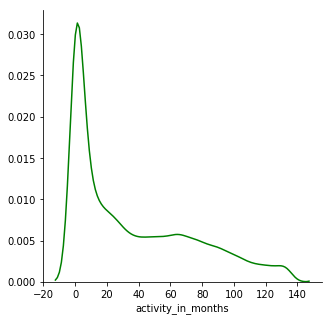

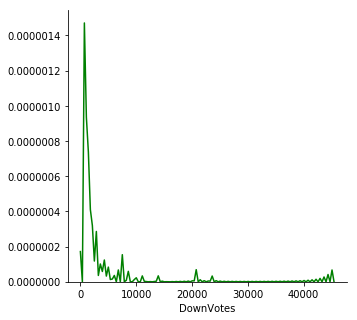

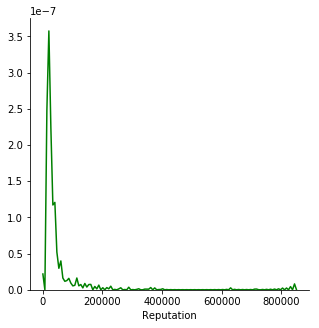

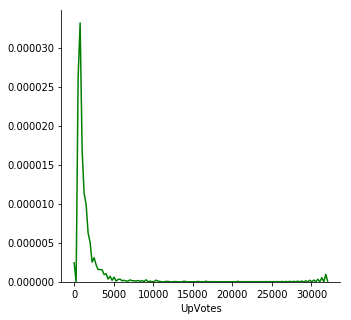

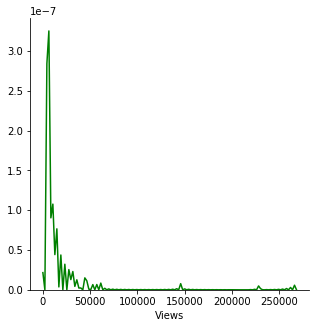

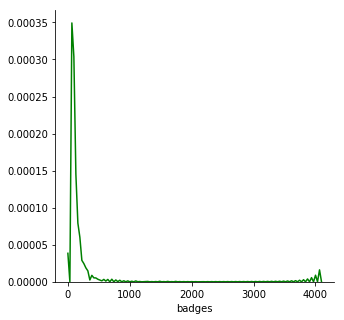

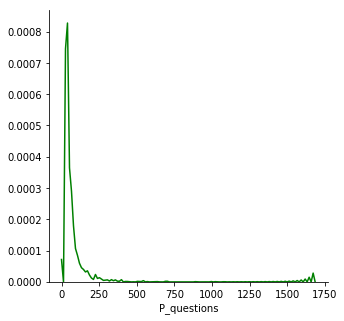

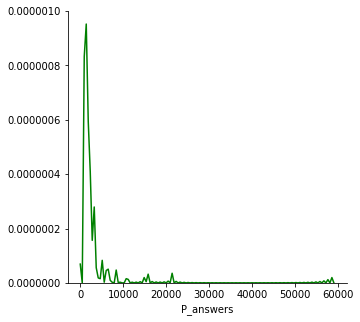

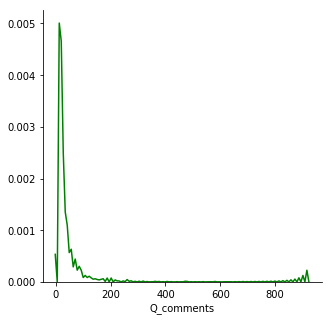

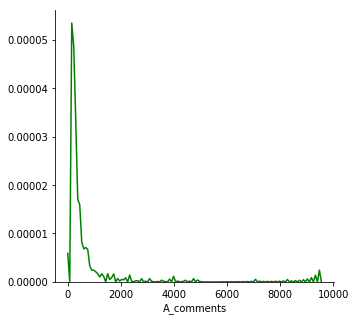

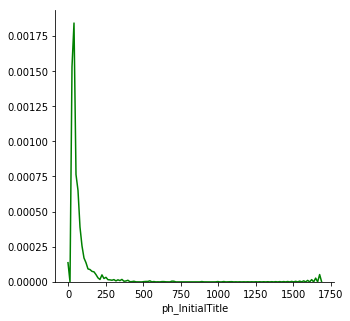

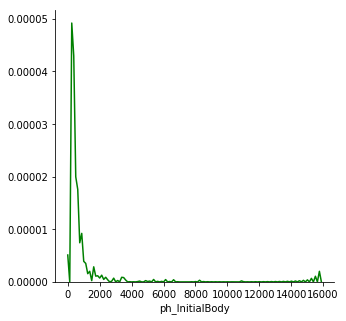

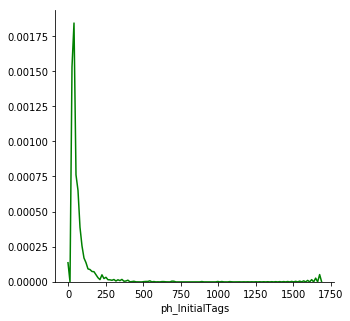

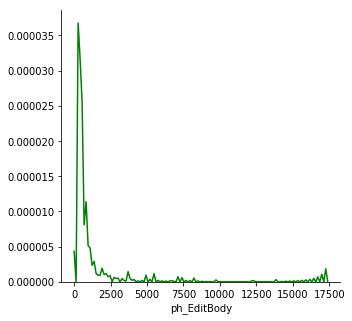

In [251]:
print(df['activity_in_months'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['activity_in_months'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['DownVotes'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['DownVotes'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['Reputation'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['Reputation'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['UpVotes'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['UpVotes'], rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['Views'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['Views'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['badges'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['badges'], rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['P_questions'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['P_questions'], rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['P_answers'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['P_answers'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['Q_comments'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['Q_comments'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['A_comments'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['A_comments'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['ph_InitialTitle'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['ph_InitialTitle'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['ph_InitialBody'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['ph_InitialBody'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['ph_InitialTags'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['ph_InitialTags'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});
print(df['ph_EditBody'].describe())
plt.figure(figsize=(5,5))
sns.distplot(df['ph_EditBody'],rug=False, hist=False, color='g', bins=100, hist_kws={'alpha': 0.4});

<font color='brown'>With this information we can see that features are skewed right and some outliers exisit. We will eventually want to get rid of the them to get a normal distribution of the independent variable for machine learning.</font>

<font color='green'>
Note: The y-axis in a density plot represents the probability density function for the kernel density estimation. However, we need to be careful to specify this is a probability density and not a probability. The difference is the probability density is the probability per unit on the x-axis.</font>

Let's visualize the numerical quantities for the non missing data variables using boxplots to have a better sense of the outliers. 
## Boxplot of numerical variables

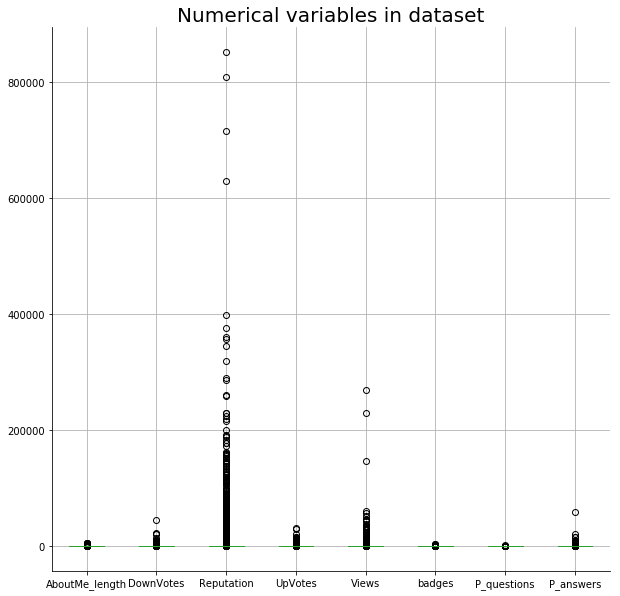

In [252]:
num_cols = ['AboutMe_length','DownVotes','Reputation','UpVotes','Views','badges', 'P_questions', 'P_answers','Q_comments','A_comments','ph_InitialTitle','ph_InitialBody','ph_InitialTags','ph_EditBody']
plt.figure(figsize=(10,10))
df[num_cols].boxplot()
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()

## Numerical data distribution

For this part lets look at the distribution of all of the features by ploting them
To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [253]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [254]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,A_comments,P_questions,P_answers,ph_InitialTitle,ph_InitialBody,ph_InitialTags,ph_EditBody
0,1407.0,0.0,0,0,1,2,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,622.0,0.0,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,370.0,0.0,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,400.0,0.0,0,0,1,1,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,32.0,0.0,0,0,1,0,1,NaN,NaN,0,0,NaN,NaN,NaN,NaN


Now lets plot them all:

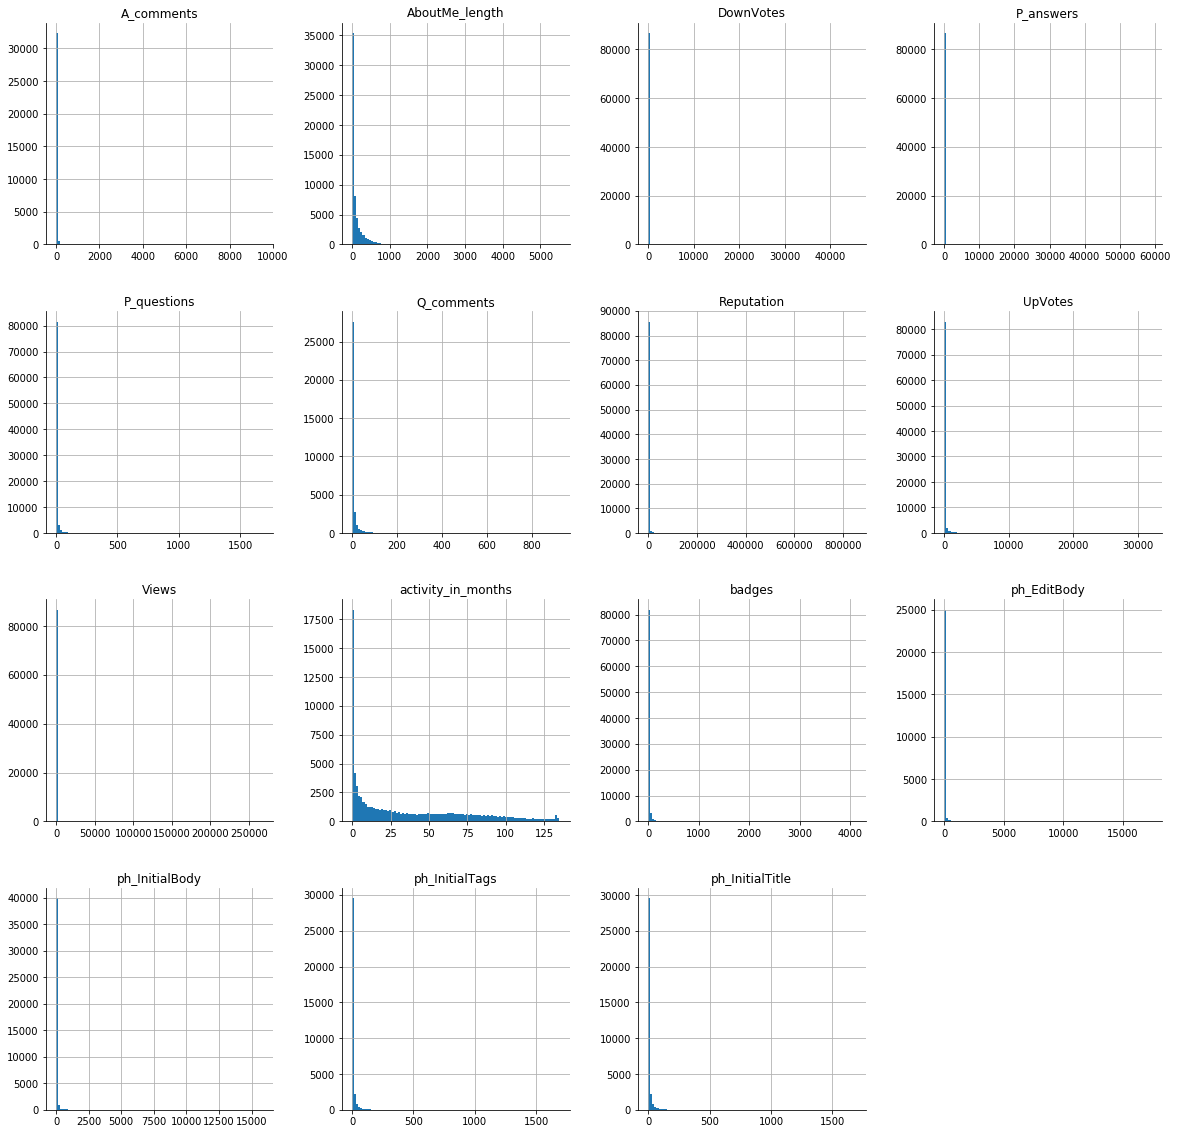

In [255]:
df_num.hist(figsize=(20,20), bins=100, xlabelsize=10, ylabelsize=10); # ; avoid having the matplotlib verbose informations

<font color='chocolate'>Features seems to share a similar distribution as they are all right skewed and some outliers exisit.</font>

After removing access features, now we'll try to find which features are strongly correlated with independent features `P_questions` and `P_answers`. We'll store them in a var called `golden_features_list`. We'll reuse our `df_num` dataset to do so.

In [261]:
df_num_corr = df_num.corr()['P_questions'][:-6] # ASCII:080 095 113 117 101 115 116 105 111 110 115
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with P_questions:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with P_questions:
Q_comments    0.768650
badges        0.594039
Name: P_questions, dtype: float64


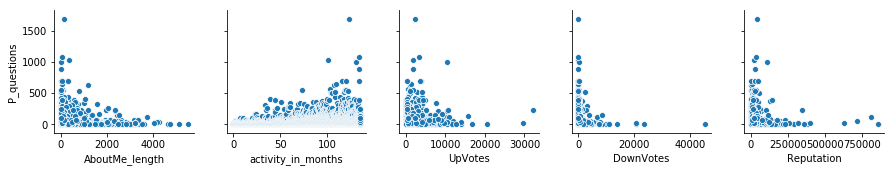

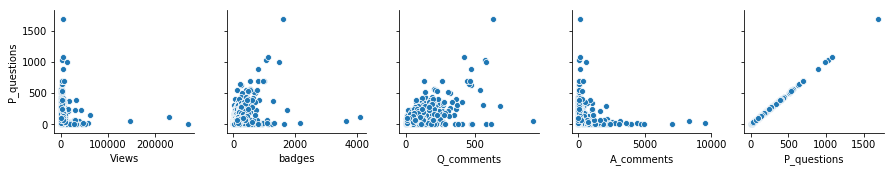

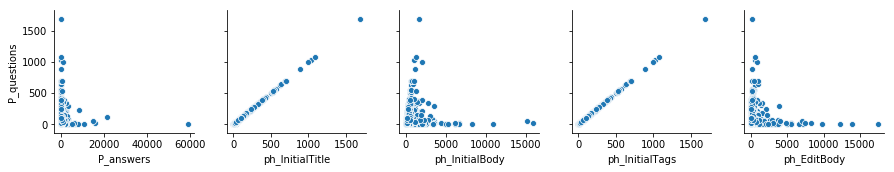

In [257]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['P_questions'])

In [262]:
df_num_corr = df_num.corr()['P_answers'][:-5] # ASCII:080 095 097 110 115 119 101 114 115 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with P_answers:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with P_answers:
A_comments    0.966265
Views         0.878901
Reputation    0.795818
badges        0.500124
Name: P_answers, dtype: float64


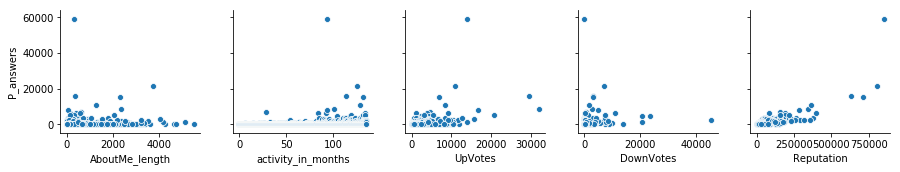

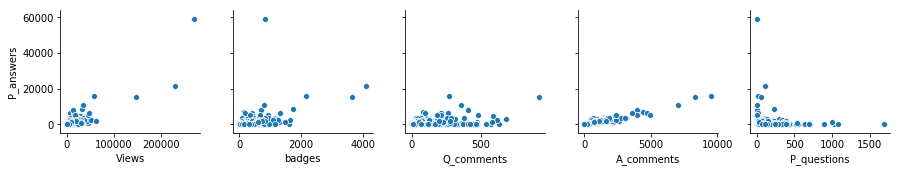

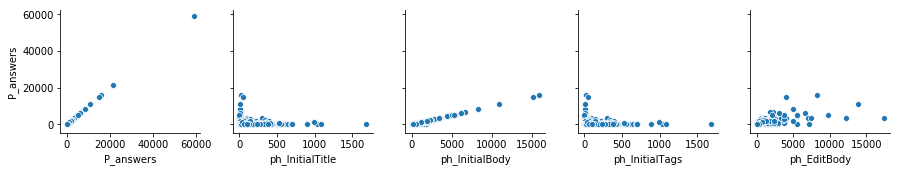

In [259]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['P_answers'])

we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

- Plot the numerical features and see which ones have very few or explainable outliers
- Remove the outliers from these features and see which one can have a good correlation without their outliers
    
Correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship with independent variables. 

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

We can identify some relationships as it seems like dependent variables have a linear relationship with the independent variables and if we look closely at the data we can see that a lot of data points are located on `x = 0 and x = 1` which may indicate the users behaviour norm.

lets remove these `0` values then repeat the process of finding correlated values: 

In [264]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 6): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'P_questions']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['P_questions'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

 AboutMe_length: 0.009416302996562162
      DownVotes: 0.020043604287645816
     A_comments: 0.08807096893983775
          Views: 0.11740331553476267
     Reputation: 0.1722356142044341
        UpVotes: 0.2705783193965854
activity_in_months: 0.27124572205867953
         badges: 0.5866295066649807
     Q_comments: 0.7603258283265041


In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with P_questions:\n{}".format(len(golden_features_list), golden_features_list))

In [265]:
individual_features_df = []
for i in range(0, len(df_num.columns) - 5): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'P_answers']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['P_answers'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

 AboutMe_length: 0.06479322909610799
activity_in_months: 0.09243601038526883
    P_questions: 0.12381131351665459
      DownVotes: 0.21285163716624816
        UpVotes: 0.4414124697071496
     Q_comments: 0.4607544544074192
         badges: 0.5011979659010427
     Reputation: 0.7958182279201906
          Views: 0.8787179557496037
     A_comments: 0.9659251775993026


In [ ]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with P_answers:\n{}".format(len(golden_features_list), golden_features_list))